In [1]:
import numpy as np
import pandas as pd
import shap

/home/wbjeong/.conda/envs/conch/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
cancer='BLCA'

In [61]:
features=pd.read_csv('/home/wbjeong/cancer/JJM/metadata/'+cancer+'_omics.csv')
raw_value=pd.read_csv('/home/wbjeong/cancer/JJM/code/datasets_csv_mutsig/tcga_blca_all_clean.csv.zip')
samples=pd.read_csv('/home/wbjeong/cancer/JJM/results/SNN/'+cancer+'/1.csv')
#'TCGA-B4-5377' in list(samples.iloc[:,1])
#'TCGA-B0-5107'in list(samples.iloc[:,1])
'TCGA-FD-A62P'in list(samples.iloc[:,1])

True

In [62]:
sample ='TCGA-FD-A62P'

In [63]:
ind=samples[samples.iloc[:,1]==sample ].index

In [64]:
s=np.load('/home/wbjeong/cancer/JJM/results/SNN/'+cancer+'/'+cancer+'1.npy')

In [65]:
df=pd.DataFrame(s)
df.columns=features.columns[1:]
raw_value=raw_value[raw_value['case_id']==sample]

In [66]:
raw_value

,Unnamed: 0,case_id,slide_id,age,site,survival_months,censorship,is_female,oncotree_code,train,...,ZNF236_mut,ZNF292_mut,ZNF423_mut,ZNF521_mut,ZNF536_mut,ZNF626_mut,ZNF804A_mut,ZNF91_mut,ZZEF1_mut,RAS_mut
182,182,TCGA-FD-A62P,TCGA-FD-A62P-01Z-00-DX1.56B14555-896E-420A-AE8...,76,FD,6.27,0,0,BLCA,1.0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
df.iloc[ind,:]
# 열 이름이 '_rnaseq'로 끝나는 열만 필터링
filtered_columns = [col for col in df.columns if col.endswith('_rnaseq')]
filtered_df = df[filtered_columns]
filtered_df=filtered_df.iloc[ind,:]
RNA=np.transpose(filtered_df)
RNA.columns=['Integrated Gradient Attribution']
RNA['abs_value']=abs(RNA['Integrated Gradient Attribution'])
RNA['raw']=list(raw_value.loc[:,RNA.index].iloc[0,:])
RNA=RNA.sort_values('abs_value',ascending=False)
RNA['Genes']=RNA.index

In [68]:
df.iloc[ind,:]
# 열 이름이 '_rnaseq'로 끝나는 열만 필터링
filtered_columns = [col for col in df.columns if not col.endswith('_rnaseq')]
filtered_df = df[filtered_columns]
filtered_df=filtered_df.iloc[ind,:]
CNV=np.transpose(filtered_df)
CNV.columns=['Integrated Gradient Attribution']
CNV['abs_value']=abs(CNV['Integrated Gradient Attribution'])
CNV['raw']=list(raw_value.loc[:,CNV.index].iloc[0,:])
CNV=CNV.sort_values('abs_value',ascending=False)
CNV['Genes']=CNV.index


In [103]:
from shap.plots.colors._colors import red_blue, red_blue_circle, red_blue_no_bounds
red_blue1 = [red_blue(i / 5.) for i in range(5)]

In [70]:
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

In [89]:
CNV.loc[['SF3B1_mut','ASXL2_mut','PLXNA4_mut','FBN3_mut','DST_mut','CTNNA2_mut','ABCB5_mut']]

,Integrated Gradient Attribution,abs_value,raw,Genes
SF3B1_mut,-1.326695,1.326695,1,SF3B1_mut
ASXL2_mut,-1.197135,1.197135,1,ASXL2_mut
PLXNA4_mut,-1.057764,1.057764,1,PLXNA4_mut
FBN3_mut,0.854474,0.854474,1,FBN3_mut
DST_mut,-0.705297,0.705297,1,DST_mut
CTNNA2_mut,-1.090686,1.090686,1,CTNNA2_mut
ABCB5_mut,1.108613,1.108613,1,ABCB5_mut


In [73]:
RNA.loc[['FOXL2_rnaseq','PPKACA_rnaseq','MYLK3_rnaseq','GREM1_rnaseq','GAK_rnaseq','EPHA1_rnaseq','DYRK2_rnaseq']]

KeyError: "['PPKACA_rnaseq'] not in index"

In [74]:
for i in RNA.index:
    if 'PPK' in i:
        print(i)

In [50]:
norm = Normalize(vmin=CNV['raw'].min(), vmax=1)

In [86]:
CNV

,Integrated Gradient Attribution,abs_value,raw,Genes
SF3B1_mut,-1.326695,1.326695,1,SF3B1_mut
ASXL2_mut,-1.197135,1.197135,1,ASXL2_mut
TET1_mut,1.123169,1.123169,1,TET1_mut
ABCB5_mut,1.108613,1.108613,1,ABCB5_mut
CHD4_mut,-1.098031,1.098031,1,CHD4_mut
...,...,...,...,...
BRCA2_mut,-0.000502,0.000502,0,BRCA2_mut
ANKRD12_mut,0.000369,0.000369,0,ANKRD12_mut
FREM2_mut,-0.000289,0.000289,0,FREM2_mut
MYH9_mut,-0.000077,0.000077,0,MYH9_mut


/tmp/ipykernel_2865541/1912949353.py:14: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.barplot(x='Integrated Gradient Attribution', y='Genes',hue='raw', data=CNV.loc[['SF3B1_mut','ASXL2_mut','PLXNA4_mut','FBN3_mut','DST_mut','CTNNA2_mut','ABCB5_mut'],:], orient='h',ax=axes[0], palette=red_blue2)


/tmp/ipykernel_2865541/1912949353.py:32: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Integrated Gradient Attribution', y='Genes',hue='A', data=RNA.loc[['FOXL2_rnaseq','PRKACA_rnaseq','MYLK3_rnaseq','GREM1_rnaseq','GAK_rnaseq','EPHA1_rnaseq','DYRK2_rnaseq'],:], orient='h',ax=axes[1],  palette=red_blue1)


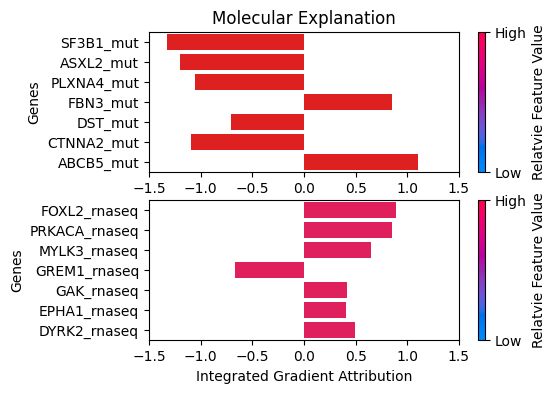

In [105]:

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 서브플롯 설정
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 4))  # 1행 2열의 서브플롯

# 첫 번째 데이터에 대한 가로 막대 그래프
red_blue1 = [red_blue(i / 1.) for i in range(5)]
red_blue2 = ['red', 'red']
CNV.loc[CNV[CNV.iloc[:,-2]==2].index,'raw']=1
CNV.loc[CNV[CNV.iloc[:,-2]<0].index,'raw']=0
sns.barplot(x='Integrated Gradient Attribution', y='Genes',hue='raw', data=CNV.loc[['SF3B1_mut','ASXL2_mut','PLXNA4_mut','FBN3_mut','DST_mut','CTNNA2_mut','ABCB5_mut'],:], orient='h',ax=axes[0], palette=red_blue2)
axes[0].set_title('Molecular Explanation')
axes[0].set_xlim(-1.5, 1.5) 
norm = Normalize(vmin=0, vmax=1)

sm = ScalarMappable(cmap=red_blue, norm=norm)
cbar=plt.colorbar(sm, ax=axes[0], orientation='vertical')
cbar.set_ticks([]) 
cbar.set_ticks([0,1])
cbar.set_ticklabels(['Low', 'High'])
cbar.set_label('Relatvie Feature Value')
axes[0].legend().remove()
# 두 번째 데이터에 대한 가로 막대 그래프
red_blue1 = [red_blue(i / 2.) for i in range(3)]
red_blue1 =[(1.0, 0.0, 0.31796406298163893, 1.0)]
RNA['A']=None
RNA.loc[RNA[RNA['raw']>= -0.2293].index,'A']=1
RNA.loc[RNA[RNA['raw']<-0.2293].index,'A']=0
sns.barplot(x='Integrated Gradient Attribution', y='Genes',hue='A', data=RNA.loc[['FOXL2_rnaseq','PRKACA_rnaseq','MYLK3_rnaseq','GREM1_rnaseq','GAK_rnaseq','EPHA1_rnaseq','DYRK2_rnaseq'],:], orient='h',ax=axes[1],  palette=red_blue1)
axes[1].set_xlim(-1.5, 1.5)

norm = Normalize(vmin=RNA['A'].min(), vmax=RNA['A'].max())
sm = ScalarMappable(cmap=red_blue, norm=norm)
cbar = plt.colorbar(sm, ax=axes[1], orientation='vertical')
cbar.set_ticks([]) 
cbar.set_ticks([RNA['A'].min(),RNA['A'].max()])
cbar.set_ticklabels(['Low', 'High'])
cbar.set_label('Relatvie Feature Value')
axes[1].legend().remove()
plt.savefig('/home/wbjeong/cancer/JJM/figures/'+cancer+'/SNN/'+sample+'.pdf',bbox_inches='tight')

/tmp/ipykernel_2865541/2119207675.py:13: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.barplot(x='Integrated Gradient Attribution', y='Genes',hue='raw', data=CNV.loc[['FLG_mut','HYDIN_mut','TTC3_mut','UNC13C_mut','LINC00709_cnv','XIRP2_mut','ROPN1L_cnv']], orient='h',ax=axes[0], palette=red_blue1)


/tmp/ipykernel_2865541/2119207675.py:31: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Integrated Gradient Attribution', y='Genes',hue='A', data=RNA.loc[['GRK7_rnaseq','RIOK3_rnaseq','SRPK2_rnaseq','FGF6_rnaseq','FBXW7_rnaseq','LAMP3_rnaseq','RET_rnaseq'],:], orient='h',ax=axes[1],  palette=red_blue1)


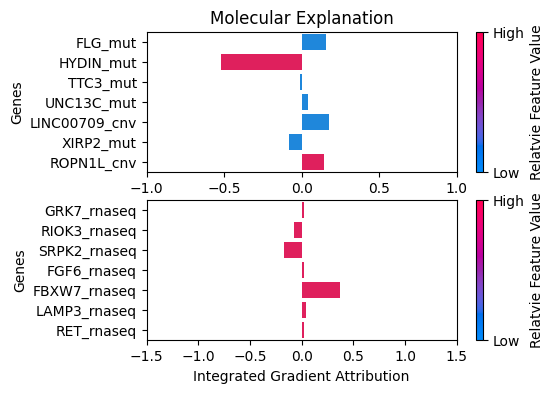

In [95]:

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 서브플롯 설정
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 4))  # 1행 2열의 서브플롯

# 첫 번째 데이터에 대한 가로 막대 그래프
red_blue1 = [red_blue(i / 1.) for i in range(3)]
CNV.loc[CNV[CNV.iloc[:,-2]==2].index,'raw']=1
CNV.loc[CNV[CNV.iloc[:,-2]<0].index,'raw']=0
sns.barplot(x='Integrated Gradient Attribution', y='Genes',hue='raw', data=CNV.loc[['FLG_mut','HYDIN_mut','TTC3_mut','UNC13C_mut','LINC00709_cnv','XIRP2_mut','ROPN1L_cnv']], orient='h',ax=axes[0], palette=red_blue1)
axes[0].set_title('Molecular Explanation')
axes[0].set_xlim(-1, 1) 
norm = Normalize(vmin=0, vmax=1)

sm = ScalarMappable(cmap=red_blue, norm=norm)
cbar=plt.colorbar(sm, ax=axes[0], orientation='vertical')
cbar.set_ticks([]) 
cbar.set_ticks([CNV['raw'].min(),CNV['raw'].max()])
cbar.set_ticklabels(['Low', 'High'])
cbar.set_label('Relatvie Feature Value')
axes[0].legend().remove()
# 두 번째 데이터에 대한 가로 막대 그래프
red_blue1 = [red_blue(i / 2.) for i in range(3)]
red_blue1 =[(1.0, 0.0, 0.31796406298163893, 1.0)]
RNA['A']=None
RNA.loc[RNA[RNA['raw']>= -0.2293].index,'A']=1
RNA.loc[RNA[RNA['raw']<-0.2293].index,'A']=0
sns.barplot(x='Integrated Gradient Attribution', y='Genes',hue='A', data=RNA.loc[['GRK7_rnaseq','RIOK3_rnaseq','SRPK2_rnaseq','FGF6_rnaseq','FBXW7_rnaseq','LAMP3_rnaseq','RET_rnaseq'],:], orient='h',ax=axes[1],  palette=red_blue1)
axes[1].set_xlim(-1.5, 1.5)

norm = Normalize(vmin=RNA['A'].min(), vmax=RNA['A'].max())
sm = ScalarMappable(cmap=red_blue, norm=norm)
cbar = plt.colorbar(sm, ax=axes[1], orientation='vertical')
cbar.set_ticks([]) 
cbar.set_ticks([RNA['A'].min(),RNA['A'].max()])
cbar.set_ticklabels(['Low', 'High'])
cbar.set_label('Relatvie Feature Value')
axes[1].legend().remove()
plt.savefig('/home/wbjeong/cancer/JJM/figures/'+cancer+'/SNN/'+sample+'.pdf',bbox_inches='tight')

In [59]:
CNV['raw'].max()

2

In [21]:
norm